![CAO](https://upload.wikimedia.org/wikipedia/commons/5/51/Central_Applications_Office.png)

# CAO Points Analysis

<br>

In this notebook we will learn how to:
- Load the **CAO points** information from the CAO website into a pandas data frame. This will cover the points from the year 2019 to 2021.
- Create a detailed comparison of CAO points in 2019, 2020, and 2021 using the functionality in **pandas**.
- Use **plots** and other visualisations to show the data analysis.

***
## Imports
***

The following imports are required to run this notebook.

In [1]:
# Regular expressions.
import re

# Convenient HTTP requests.
import requests as rq

# Numerical arrays
import numpy as np

# Import Pandas
import pandas as pd

# Dates and times.
import datetime as dt

#import csv
import csv

#import camelot
import camelot

# For downloading.
import urllib.request as urlrq

# plotting
import matplotlib.pyplot as plt

# Magic function 
%matplotlib inline

# Change default style sheet
plt.style.use('fivethirtyeight')

# Change the default parameters
plt.rcParams['figure.figsize'] = [10, 6]

# Seaborn plots
import seaborn as sns

Please note that for the **2019 points** you will need to download and Install [Ghostscript](https://www.ghostscript.com/releases/gsdnld.html) and you will also need to install [Camelot](https://camelot-py.readthedocs.io/en/master/). The instructions for these two requirements can be found in the **2019 points** section of this noteboook.

### Code for Creating File Paths
***
<br>

The below code is used to generate the file paths for saving the original date for the CAO points. We will use `datetime.datetime.now` which generates a timestamp from the moment in t. [15] We will then use `strftime` to create a string with the timestamp as the name. [16] The variable `nowstr` (Now String) will be used in the file paths to save original data to the data folder in this repository.

In [2]:
# Get the current date and time.
now = dt.datetime.now()

# Format as a string.
# This will be used as a timestamp in the saved files
nowstr = now.strftime('%Y%m%d_%H%M%S')

***
## 2021 Points

http://www.cao.ie/index.php?page=points&p=2021
***

In [3]:
# Fetch the CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l8.php')

# Have a quick peek. 200 means OK.
resp

<Response [200]>

Now we need to create a file path to save the original data using the **timestamp** that we created above as the filename. This will save the original data to the data folder in this repository. This method means that we will never overwrite our original data because the filename will always be different if at least a second has passed since the last time `path2021` was run.

In [4]:
# Create a file path for the original data.
path2021 = 'data/cao2021_' + nowstr + '.html'

In [5]:
# The server uses the wrong encoding, fix it.
original_encoding = resp.encoding

# Change to cp1252.
resp.encoding = 'cp1252'

In [6]:
# Save the original html file.
with open(path2021, 'w') as f:
    f.write(resp.text)

Compile the regular expression for matching lines. r' means raw string notation. [01] This regular expression means that we are looking for 2
characer set of upper case letters from A-Z. The {}'s denote how many
occurnaces of the character set we are looking for. This is followed by 3
groups. Groups allow us to match several different patterns. The first group
is any character except a newline (.) with 0 or more repetitions (*). The
second group is 3 digits (\d{3}). The third group is a literal * which is
optional. The ? denotes that it is optional.

In [7]:
re_course = re.compile(r'([A-Z]{2}\d{3})  (.*)')

### Loop through the lines of the response
***

In [8]:
# The file path for the csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'

In [9]:
# Keep track of how many courses we process.
no_lines = 0

# Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row.
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response.
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines representing courses.
        if re_course.fullmatch(dline):
            # Add one to the lines counter.
            no_lines = no_lines + 1
            # The course code.
            course_code = dline[:5]
            # The course title.
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between.
            f.write(','.join(linesplit) + '\n')

# Print the total number of processed lines.
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


In [10]:
df2021 = pd.read_csv(path2021, encoding='cp1252')
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


### Cleaning up the Data
***
<br>

We will now rename the columns of the dataframe. We will use the same naming convention for each year. This is firstly to make the data look neater, and also so that when we use methods like `pd.sort_values()` later on, we will be able to sort the data alphabetically by their course codes. To rename the columns, we will use the method of assigning a list of new column names. We will rename the columns by directly assigning a list containing the new names to the `columns` attribute of the `df2021` object. [17]

In [11]:
df2021.columns = ['code', 'title', 'points_r1', 'points_r2']
df2021

,code,title,points_r1,points_r2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


In [12]:
df2021.iloc[7]

code                   AL830
title        General Nursing
points_r1               451*
points_r2                444
Name: 7, dtype: object

In [13]:
df2021.iloc[33]

code                   CW038
title        Art (portfolio)
points_r1               #700
points_r2                NaN
Name: 33, dtype: object

In [14]:
df2021.iloc[842]

code                                                     MH801
title        Early Childhood - Teaching and Learning (part-...
points_r1                                                  AQA
points_r2                                                  AQA
Name: 842, dtype: object

We can see above that by using `iloc`, some of the points have special characters that denote certain things about the course that needs to be addressed. In the below code, we will first turn the points field into a string so that we can then use the 'apply lambda' method to generate another column that tells us what these symbols mean. [19], [13], [14]

In [15]:
df2021['points_r1'] = df2021['points_r1'].astype(str)
df2021['points_r2'] = df2021['points_r2'].astype(str)

In [16]:
# Convert the special characters to information [19]

def points_r1_info(x):
    if r'*' in x['points_r1']:
        return 'Randomly Selected'
    elif r'#' in x['points_r1']:
        return 'Test/Portfolio'
    elif r'AQA' in x['points_r1']:
        return 'All Qualified Applicants'
    else:
        return ''

def points_r2_info(x):
    if r'*' in x['points_r1']:
        return 'Randomly Selected'
    elif r'#' in x['points_r1']:
        return 'Test/Portfolio'
    elif r'AQA' in x['points_r1']:
        return 'All Qualified Applicants'
    else:
        return ''

In [17]:
# Use pd.DataFrame.apply to add the information column to the dataframe
# [19], [13], [14]

df2021['points_r1_info'] = df2021.apply (lambda x: points_r1_info(x), axis = 1)
df2021['points_r2_info'] = df2021.apply (lambda x: points_r2_info(x), axis = 1)
df2021

,code,title,points_r1,points_r2,points_r1_info,points_r2_info
0,AL801,Software Design for Virtual Reality and Gaming,300,nan,,
1,AL802,Software Design in Artificial Intelligence for...,313,nan,,
2,AL803,Software Design for Mobile Apps and Connected ...,350,nan,,
3,AL805,Computer Engineering for Network Infrastructure,321,nan,,
4,AL810,Quantity Surveying,328,nan,,
...,...,...,...,...,...,...
944,WD211,Creative Computing,270,nan,,
945,WD212,Recreation and Sport Management,262,nan,,
946,WD230,Mechanical and Manufacturing Engineering,230,230,,
947,WD231,Early Childhood Care and Education,266,nan,,


In [18]:
# Take a look at the information columns

df2021.iloc[7]

code                          AL830
title               General Nursing
points_r1                      451*
points_r2                       444
points_r1_info    Randomly Selected
points_r2_info    Randomly Selected
Name: 7, dtype: object

In [19]:
# Remove all of the special characters from the points columns [11]
# This is to prepare the points columns to be converted to numbers.

df2021['points_r1'].replace('[a-z.#*+A-Z]', '', regex = True, inplace = True)
df2021['points_r2'].replace('[a-z.#*+A-Z]', '', regex = True, inplace = True)

### Data Types
***
<br>

In [20]:
# Check the data types of the columns [10]
# Need to change points columns to numeric

df2021.dtypes

code              object
title             object
points_r1         object
points_r2         object
points_r1_info    object
points_r2_info    object
dtype: object

In [21]:
# change the points columns from object to float [09]

df2021['points_r1'] = pd.to_numeric(df2021['points_r1'])
df2021['points_r2'] = pd.to_numeric(df2021['points_r2'])
df2021

,code,title,points_r1,points_r2,points_r1_info,points_r2_info
0,AL801,Software Design for Virtual Reality and Gaming,300.0,NaN,,
1,AL802,Software Design in Artificial Intelligence for...,313.0,NaN,,
2,AL803,Software Design for Mobile Apps and Connected ...,350.0,NaN,,
3,AL805,Computer Engineering for Network Infrastructure,321.0,NaN,,
4,AL810,Quantity Surveying,328.0,NaN,,
...,...,...,...,...,...,...
944,WD211,Creative Computing,270.0,NaN,,
945,WD212,Recreation and Sport Management,262.0,NaN,,
946,WD230,Mechanical and Manufacturing Engineering,230.0,230.0,,
947,WD231,Early Childhood Care and Education,266.0,NaN,,


In [22]:
# Check that the conversion to numeric worked

df2021.dtypes

code               object
title              object
points_r1         float64
points_r2         float64
points_r1_info     object
points_r2_info     object
dtype: object

### Save clean data
***
<br>

In [23]:
# Create a file path for the pandas data
path2021clean = 'data/cao2021_clean_csv_' + nowstr + '.csv'

In [24]:
# Save pandas data frame to disk
df2021.to_csv(path2021clean)

***
## 2020 Points

https://www.cao.ie/index.php?page=points&p=2020
***

For this dataset, a lot of the operations that we did in the 2021 Points section is very similar here. For this reason I will not explain it all again. Please refer to the 2021 Points section of this notebook if you do not find an explanation here.

In [25]:
# Create an object that contains the URL with the .xlsx file

url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

### Save Original File
***
<br>

In [26]:
# Create a file path for the original data.
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

Use `urllib.request.urlretrieve` to copy a network object denoted by a URL to a local file. [19]

In [27]:
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20220102_191904.xlsx',
 <http.client.HTTPMessage at 0x2a1e56e3e20>)

## Load Spreadsheet using pandas
***
<br>

In [28]:
# Download and parse the excel spreadsheet.
df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', skiprows=10)

In [29]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Spot check a random row.
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [31]:
# Spot check the last row.
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [32]:
# Create a file path for the pandas data.
path = 'data/cao2020_' + nowstr + '.csv'

In [33]:
# Save pandas data frame to disk.
df2020.to_csv(path)

In [34]:
# Get rid of the level 7 courses [12]

df2020 = df2020.loc[df2020["LEVEL"] > 7]
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Arts,Arts (options),WD200,AQA,NaN,AQA,NaN,AQA,NaN,336,...,avp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Look at all of the columns

pd.Series(df2020.columns)

0     CATEGORY (i.e.ISCED description)
1                         COURSE TITLE
2                         COURSE CODE2
3                            R1 POINTS
4                          R1 Random *
5                            R2 POINTS
6                           R2 Random*
7                                  EOS
8                         EOS Random *
9                        EOS Mid-point
10                               LEVEL
11                                 HEI
12                    Test/Interview #
13                                 avp
14                                   v
15                             Column1
16                             Column2
17                             Column3
18                             Column4
19                             Column5
20                             Column6
21                             Column7
22                             Column8
dtype: object

### Cleaning up the Data
***
<br>

In [36]:
# Select only Columns of Interest [11]

df2020 = df2020.loc[:, ['COURSE CODE2', 'COURSE TITLE', 'R1 POINTS', 'R2 POINTS', 'EOS', 'EOS Mid-point']]

In [37]:
# Rename the columns
df2020.columns = ['code', 'title', 'points_r1', 'points_r2', 'eos_points', 'mid-point']

# Convert field into a string so that we can then use the 'apply lambda' method

df2020['points_r1'] = df2020['points_r1'].astype(str)
df2020['points_r2'] = df2020['points_r2'].astype(str)

# Generate another column that tells us what these symbols mean

df2020['points_r1_info'] = df2020.apply (lambda x: points_r1_info(x), axis = 1)
df2020['points_r2_info'] = df2020.apply (lambda x: points_r2_info(x), axis = 1)

# Remove all non-numeric characters that appeared in the Points columns
df2020['points_r1'].replace('[a-z.#*+A-Z]', '',regex = True, inplace = True)
df2020['points_r2'].replace('[a-z.#*+A-Z]', '',regex = True, inplace = True)
df2020['eos_points'].replace('[a-z.#*+A-Z]', '',regex = True, inplace = True)
df2020['mid-point'].replace('[a-z.#*+A-Z]', '', regex = True, inplace = True)

df2020

,code,title,points_r1,points_r2,eos_points,mid-point,points_r1_info,points_r2_info
0,AC120,International Business,209,,209,280,,
1,AC137,Liberal Arts,252,,252,270,,
2,AD101,"First Year Art & Design (Common Entry,portfolio)",,,,,Test/Portfolio,Test/Portfolio
3,AD102,Graphic Design and Moving Image Design (portfo...,,,,,Test/Portfolio,Test/Portfolio
4,AD103,Textile & Surface Design and Jewellery & Objec...,,,,,Test/Portfolio,Test/Portfolio
...,...,...,...,...,...,...,...,...
1455,WD200,Arts (options),,,,336,All Qualified Applicants,All Qualified Applicants
1460,WD210,Software Systems Development,279,,279,337,,
1461,WD211,Creative Computing,271,,271,318,,
1462,WD212,Recreation and Sport Management,270,,270,349,,


### Data Types
***
<br>

In [38]:
# Check the data types [10]
df2020.dtypes

code              object
title             object
points_r1         object
points_r2         object
eos_points        object
mid-point         object
points_r1_info    object
points_r2_info    object
dtype: object

In [39]:
# change the points columns from object to float [09]

df2020['points_r1'] = pd.to_numeric(df2020['points_r1'])
df2020['points_r2'] = pd.to_numeric(df2020['points_r2'])
df2020['eos_points'] = pd.to_numeric(df2020['eos_points'])
df2020['mid-point'] = pd.to_numeric(df2020['mid-point'])
df2020

,code,title,points_r1,points_r2,eos_points,mid-point,points_r1_info,points_r2_info
0,AC120,International Business,209.0,NaN,209.0,280.0,,
1,AC137,Liberal Arts,252.0,NaN,252.0,270.0,,
2,AD101,"First Year Art & Design (Common Entry,portfolio)",NaN,NaN,NaN,NaN,Test/Portfolio,Test/Portfolio
3,AD102,Graphic Design and Moving Image Design (portfo...,NaN,NaN,NaN,NaN,Test/Portfolio,Test/Portfolio
4,AD103,Textile & Surface Design and Jewellery & Objec...,NaN,NaN,NaN,NaN,Test/Portfolio,Test/Portfolio
...,...,...,...,...,...,...,...,...
1455,WD200,Arts (options),NaN,NaN,NaN,336.0,All Qualified Applicants,All Qualified Applicants
1460,WD210,Software Systems Development,279.0,NaN,279.0,337.0,,
1461,WD211,Creative Computing,271.0,NaN,271.0,318.0,,
1462,WD212,Recreation and Sport Management,270.0,NaN,270.0,349.0,,


In [40]:
# Check the data types

df2020.dtypes

code               object
title              object
points_r1         float64
points_r2         float64
eos_points        float64
mid-point         float64
points_r1_info     object
points_r2_info     object
dtype: object

### Save Clean Data
***
<br>

In [41]:
# Create a file path for the pandas data
path2020clean = 'data/cao2020_clean_csv_' + nowstr + '.csv'

In [42]:
# Save pandas data frame to disk
df2020.to_csv(path2020clean) 

***
## 2019 Points
https://www.cao.ie/index.php?page=points&p=2019
***

**_Step to reproduce_**
<br>

1. Download and Install [Ghostscript](https://www.ghostscript.com/releases/gsdnld.html). Choose public license 64 bit.
2. Install [Camelot](https://camelot-py.readthedocs.io/en/master/) using the command ``conda install -c conda-forge camelot-py`` in cmder.
3. Import the Camelot package using the command ``import camelot`` as seen in the import cell at the top of this project.
4. Create a **[TableList](https://camelot-py.readthedocs.io/en/master/api.html#camelot.core.TableList)** object called ``tables``, which is a list of Table objects using the file path of the 2019 data as seen below.
5. Seince there are 18 pages in this PDF, Set ``the read_pdf`` parameter as a range from 1-18 

In [43]:
# Create an object called 'tables' to read the PDF
# We must make sure to tell it to read every page of the document [02] [03]

tables = camelot.read_pdf('data/cao2019_20211104_143030.pdf', pages = '1-18')

In [44]:
# We can see that the tables object has 18 tables, since n=18.

tables

<TableList n=18>

In [45]:
# Check the type of the 'tables' object

type(tables)

camelot.core.TableList

In [46]:
# To access a table by using its index. We can select a table passing 
# the index. [04]

tables[0]

<Table shape=(44, 4)>

The above is the first table on the PDF file. We can also see the shape of the table, 4 rows and 44 columns. The next thing to do is to make an object for each table index below so that we can use pandas to concatonate all of the tables. [03]

In [47]:
table_1 = tables[0]
table_2 = tables[1]
table_3 = tables[2]
table_4 = tables[3]
table_5 = tables[4]
table_6 = tables[5]
table_7 = tables[6]
table_8 = tables[7]
table_9 = tables[8]
table_10 = tables[9]
table_11 = tables[10]
table_12 = tables[11]
table_13 = tables[12]
table_14 = tables[13]
table_15 = tables[14]
table_16 = tables[15]
table_17 = tables[16]
table_18 = tables[17]

We need to drop the rows that are not course names (Name of the college and the first row in table_1 which is just the headers which we will write ourselves later. To do this, take a look at each table and find the indexes that need to be dropped.for table_1 we need to drop indexes 0, 1 and 29. I will just show how the first table because the process just needs to be repeated for the rest of the tables.[04]

In [48]:
# Dropped the indexes that we do not need
table_1.df.drop([0, 1, 29])

,0,1,2,3
2,AL801,Software Design with Virtual Reality and Gaming,304,328
3,AL802,Software Design with Cloud Computing,301,306
4,AL803,Software Design with Mobile Apps and Connected...,309,337
5,AL805,Network Management and Cloud Infrastructure,329,442
6,AL810,Quantity Surveying,307,349
7,AL820,Mechanical and Polymer Engineering,300,358
8,AL830,General Nursing,410,429
9,AL832,Psychiatric Nursing,387,403
10,AL836,Nutrition and Health Science,352,383
11,AL837,Sports Science with Exercise Physiology,351,392


Once we know which rows to drop we then need to make the drop operations that we just performed permanent since these operations are not inplace. To do this we need to perform the operation for each table and then assign the operations back to the original variables as seen below. We could use the ``inplace = True`` option of the function, but this example it is neater to assign the operations back to the original variable i.e. the tables. [03] [05]

In [49]:
# Assign the drop operations back to the original variables.
table_1 = table_1.df.drop([0, 1, 29])
table_2 = table_2.df.drop([19, 23])
table_3 = table_3.df.drop([12])
table_4 = table_4.df.drop([20, 23, 25, 32])
table_5 = table_5.df.drop([1])
table_6 = table_6.df.drop([12])
table_7 = table_7.df.drop([27, 45])
table_8 = table_8.df.drop([9, 13, 32])
table_9 = table_9.df.drop([2, 13, 22, 27])
table_10 = table_10.df.drop([30])
table_11 = table_11.df.drop([17, 40])
table_12 = table_12.df.drop([33])
table_13 = table_13.df.drop([45])
table_14 = table_14.df.drop([10, 24, 22])
table_15 = table_15.df.drop([21])
table_16 = table_16.df.drop([8, 11, 47])
table_17 = table_17.df.drop([0, 33])
table_18 = table_18.df.drop([4])

We can now make an dataframe using the concatonate function in pandas.

In [50]:
df2019 = pd.concat([table_1, table_2, table_3, table_4, table_5,
                    table_6, table_7, table_8, table_9, table_10,
                    table_11, table_12, table_13, table_14, table_15,
                    table_16, table_17, table_18], ignore_index = True)

In [51]:
df2019.columns = ['code', 'title', 'points_eos', 'mid_point']
df2019

,code,title,points_eos,mid_point
0,AL801,Software Design with Virtual Reality and Gaming,304,328
1,AL802,Software Design with Cloud Computing,301,306
2,AL803,Software Design with Mobile Apps and Connected...,309,337
3,AL805,Network Management and Cloud Infrastructure,329,442
4,AL810,Quantity Surveying,307,349
...,...,...,...,...
925,WD200,Arts (options),221,296
926,WD210,Software Systems Development,271,329
927,WD211,Creative Computing,275,322
928,WD212,Recreation and Sport Management,274,311


### Cleaning Up the Data
***
<br>

In [52]:
# Same process as for 2021

def points_eos_info(x):
    if r'*' in x['points_eos']:
        return 'Randomly Selected'
    elif r'#' in x['points_eos']:
        return 'Test/Portfolio'
    elif r'AQA' in x['points_eos']:
        return 'All Qualified Applicants'
    else:
        return ''

def mid_point_info(x):
    if r'*' in x['mid_point']:
        return 'Randomly Selected'
    elif r'#' in x['mid_point']:
        return 'Test/Portfolio'
    elif r'AQA' in x['mid_point']:
        return 'All Qualified Applicants'
    else:
        return ''

In [53]:
df2019['points_eos'] = df2019['points_eos'].astype(str)
df2019['mid_point'] = df2019['mid_point'].astype(str)

In [54]:
df2019['points_eos_info'] = df2019.apply (lambda x: points_eos_info(x), axis = 1)
df2019['mid_point_info'] = df2019.apply (lambda x: mid_point_info(x), axis = 1)
df2019

,code,title,points_eos,mid_point,points_eos_info,mid_point_info
0,AL801,Software Design with Virtual Reality and Gaming,304,328,,
1,AL802,Software Design with Cloud Computing,301,306,,
2,AL803,Software Design with Mobile Apps and Connected...,309,337,,
3,AL805,Network Management and Cloud Infrastructure,329,442,,
4,AL810,Quantity Surveying,307,349,,
...,...,...,...,...,...,...
925,WD200,Arts (options),221,296,,
926,WD210,Software Systems Development,271,329,,
927,WD211,Creative Computing,275,322,,
928,WD212,Recreation and Sport Management,274,311,,


In [55]:
# Remove all of the special characters from the points columns [11]
# This is to prepare the points columns to be converted to numbers.

df2019['points_eos'].replace('[a-z.#*+A-Z]', '', regex = True, inplace = True)
df2019['mid_point'].replace('[a-z.#*+A-Z]', '', regex = True, inplace = True)
df2019

,code,title,points_eos,mid_point,points_eos_info,mid_point_info
0,AL801,Software Design with Virtual Reality and Gaming,304,328,,
1,AL802,Software Design with Cloud Computing,301,306,,
2,AL803,Software Design with Mobile Apps and Connected...,309,337,,
3,AL805,Network Management and Cloud Infrastructure,329,442,,
4,AL810,Quantity Surveying,307,349,,
...,...,...,...,...,...,...
925,WD200,Arts (options),221,296,,
926,WD210,Software Systems Development,271,329,,
927,WD211,Creative Computing,275,322,,
928,WD212,Recreation and Sport Management,274,311,,


In [56]:
df2019.iloc[23]

code                                                AL861
title              Animation and Illustration (portfolio)
points_eos                                            615
mid_point                                             899
points_eos_info                            Test/Portfolio
mid_point_info                                           
Name: 23, dtype: object

### Data Types
***
<br>

In [57]:
# Check the data types [10]

df2019.dtypes

code               object
title              object
points_eos         object
mid_point          object
points_eos_info    object
mid_point_info     object
dtype: object

In [58]:
# change the points columns from object to float [09]

df2019['points_eos'] = pd.to_numeric(df2019['points_eos'])
df2019['mid_point'] = pd.to_numeric(df2019['mid_point'])
df2019

,code,title,points_eos,mid_point,points_eos_info,mid_point_info
0,AL801,Software Design with Virtual Reality and Gaming,304.0,328.0,,
1,AL802,Software Design with Cloud Computing,301.0,306.0,,
2,AL803,Software Design with Mobile Apps and Connected...,309.0,337.0,,
3,AL805,Network Management and Cloud Infrastructure,329.0,442.0,,
4,AL810,Quantity Surveying,307.0,349.0,,
...,...,...,...,...,...,...
925,WD200,Arts (options),221.0,296.0,,
926,WD210,Software Systems Development,271.0,329.0,,
927,WD211,Creative Computing,275.0,322.0,,
928,WD212,Recreation and Sport Management,274.0,311.0,,


In [59]:
df2019.dtypes

code                object
title               object
points_eos         float64
mid_point          float64
points_eos_info     object
mid_point_info      object
dtype: object

### Save the Clean Data
***
<br>

In [60]:
# Create a file path for the pandas data
path2019clean = 'data/cao2019_clean_csv_' + nowstr + '.csv'

In [61]:
# Save pandas data frame to disk
df2019.to_csv(path2019clean)

***
## Concatonate and Join the Years
***

In [62]:
courses2021 = df2021[['code', 'title']]

In [63]:
courses2020 = df2020[['code','title']]

In [64]:
courses2019 = df2019[['code', 'title']]

In [65]:
# Concatonate the years in on object called 'allcourses' [20]

allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)

In [66]:
# Sort values by 'code' [21]

allcourses.sort_values('code')
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2901,WD200,Arts (options)
2902,WD210,Software Systems Development
2903,WD211,Creative Computing
2904,WD212,Recreation and Sport Management


In [67]:
# Check for duplicates

allcourses.loc[175]['title']

'International Business'

In [68]:
# Check for duplicates

allcourses.loc[949]['title']

'International Business'

In [69]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
2901,WD200,Arts (options)
2902,WD210,Software Systems Development
2903,WD211,Creative Computing
2904,WD212,Recreation and Sport Management


In [70]:
# Returns a copy of the data frame with duplciates removed.
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2844,TL801,Animation Visual Effects and Motion Design
2845,TL802,"TV, Radio and New Media"
2846,TL803,Music Technology
2849,TL812,Computing with Digital Media


In [71]:
# Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
2901,WD200,Arts (options)
2902,WD210,Software Systems Development
2903,WD211,Creative Computing
2904,WD212,Recreation and Sport Management


In [72]:
# Returns a copy of the data frame with duplciates removed - based only on code.
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [73]:
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1209,SG441,Environmental Science
1210,SG446,Applied Archaeology
1211,TL803,Music Technology
1212,TL812,Computing with Digital Media


***
## Join the Points
***

In [74]:
# Set the index to the code column.
df2021.set_index('code', inplace=True)

In [75]:
# Set the index to the code column.
allcourses.set_index('code', inplace=True)

### Round 1 Points
***
<br>

In [76]:
df2021_r1 = df2021[['points_r1', 'points_r1_info']]
df2021_r1.columns = ['points_r1_2021', 'points_r1_2021_info']
df2021_r1

,points_r1_2021,points_r1_2021_info
code,,
AL801,300.0,
AL802,313.0,
AL803,350.0,
AL805,321.0,
AL810,328.0,
...,...,...
WD211,270.0,
WD212,262.0,
WD230,230.0,


In [77]:
# Create an object that joins the points from 2021 to the object 'allcourses'

allcourses_r1 = allcourses.join(df2021_r1[['points_r1_2021', 'points_r1_2021_info']])
allcourses_r1

,title,points_r1_2021,points_r1_2021_info
code,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,
AL802,Software Design in Artificial Intelligence for...,313.0,
AL803,Software Design for Mobile Apps and Connected ...,350.0,
AL805,Computer Engineering for Network Infrastructure,321.0,
AL810,Quantity Surveying,328.0,
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [78]:
df2020_r1 = df2020[['code', 'points_r1', 'points_r1_info']]
df2020_r1.columns = ['code', 'points_r1_2020', 'points_r1_2020_info']
df2020_r1

,code,points_r1_2020,points_r1_2020_info
0,AC120,209.0,
1,AC137,252.0,
2,AD101,NaN,Test/Portfolio
3,AD102,NaN,Test/Portfolio
4,AD103,NaN,Test/Portfolio
...,...,...,...
1455,WD200,NaN,All Qualified Applicants
1460,WD210,279.0,
1461,WD211,271.0,
1462,WD212,270.0,


In [79]:
# Set the index to the code column.
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020,points_r1_2020_info
code,,
AC120,209.0,
AC137,252.0,
AD101,NaN,Test/Portfolio
AD102,NaN,Test/Portfolio
AD103,NaN,Test/Portfolio
...,...,...
WD200,NaN,All Qualified Applicants
WD210,279.0,
WD211,271.0,


In [80]:
# Join 2020 points to allcourses.
allcourses_r1 = allcourses_r1.join(df2020_r1)
allcourses_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info
code,,,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,,303.0,
AL802,Software Design in Artificial Intelligence for...,313.0,,332.0,
AL803,Software Design for Mobile Apps and Connected ...,350.0,,337.0,
AL805,Computer Engineering for Network Infrastructure,321.0,,333.0,
AL810,Quantity Surveying,328.0,,319.0,
...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN,NaN
SG446,Applied Archaeology,NaN,NaN,NaN,NaN
TL803,Music Technology,NaN,NaN,NaN,NaN


For the 2019 points I used the End of Season (EOS) points as both the round 1 and round 2 points. This is because looking at the 2021 and 2020 points, OS = Rnd2 where there is a Rnd2 otherwise EOS = Rnd1. Therefore it seems to make sense to use EOS as the round 1 and round 2 points for 2019.

In [81]:
df2019_r1 = df2019[['code', 'points_eos', 'points_eos_info']]
df2019_r1.columns = ['code', 'points_r1_2019', 'points_r1_2019_info']
df2019_r1

,code,points_r1_2019,points_r1_2019_info
0,AL801,304.0,
1,AL802,301.0,
2,AL803,309.0,
3,AL805,329.0,
4,AL810,307.0,
...,...,...,...
925,WD200,221.0,
926,WD210,271.0,
927,WD211,275.0,
928,WD212,274.0,


In [82]:
# Set the index to the code column.
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019,points_r1_2019_info
code,,
AL801,304.0,
AL802,301.0,
AL803,309.0,
AL805,329.0,
AL810,307.0,
...,...,...
WD200,221.0,
WD210,271.0,
WD211,275.0,


In [83]:
# Join 2019 points to allcourses.
allcourses_r1 = allcourses_r1.join(df2019_r1)
allcourses_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,300.0,,303.0,,304.0,
AL802,Software Design in Artificial Intelligence for...,313.0,,332.0,,301.0,
AL803,Software Design for Mobile Apps and Connected ...,350.0,,337.0,,309.0,
AL805,Computer Engineering for Network Infrastructure,321.0,,333.0,,329.0,
AL810,Quantity Surveying,328.0,,319.0,,307.0,
...,...,...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,NaN,NaN,297.0,
SG446,Applied Archaeology,NaN,NaN,NaN,NaN,289.0,
TL803,Music Technology,NaN,NaN,NaN,NaN,264.0,


In [84]:
# Can now use course codes as loc

allcourses_r1.loc['WD148']

title                  Tourism Marketing
points_r1_2021                       NaN
points_r1_2021_info                  NaN
points_r1_2020                       NaN
points_r1_2020_info                  NaN
points_r1_2019                     269.0
points_r1_2019_info                     
Name: WD148, dtype: object

In [85]:
allcourses_r1.sort_values('code', inplace = True)

#### Data Types
<br>

In [86]:
# Check the data types [10]

allcourses_r1.dtypes

title                   object
points_r1_2021         float64
points_r1_2021_info     object
points_r1_2020         float64
points_r1_2020_info     object
points_r1_2019         float64
points_r1_2019_info     object
dtype: object

In [87]:
# change the points columns from object to float [09]

allcourses_r1['points_r1_2021'] = pd.to_numeric(allcourses_r1['points_r1_2021'])
allcourses_r1['points_r1_2020'] = pd.to_numeric(allcourses_r1['points_r1_2020'])
allcourses_r1['points_r1_2019'] = pd.to_numeric(allcourses_r1['points_r1_2019'])
allcourses_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info
code,,,,,,,
AC120,International Business,294.0,,209.0,,234.0,
AC137,Liberal Arts,271.0,,252.0,,252.0,
AD101,First Year Art and Design (Common Entry portfo...,554.0,Test/Portfolio,NaN,Test/Portfolio,550.0,Test/Portfolio
AD102,Graphic Design and Moving Image Design (portfo...,538.0,Test/Portfolio,NaN,Test/Portfolio,635.0,Test/Portfolio
AD103,Textile and Surface Design and Jewellery and O...,505.0,Test/Portfolio,NaN,Test/Portfolio,545.0,Test/Portfolio
...,...,...,...,...,...,...,...
WD211,Creative Computing,270.0,,271.0,,275.0,
WD212,Recreation and Sport Management,262.0,,270.0,,274.0,
WD230,Mechanical and Manufacturing Engineering,230.0,,253.0,,273.0,


In [88]:
allcourses_r1.dtypes

title                   object
points_r1_2021         float64
points_r1_2021_info     object
points_r1_2020         float64
points_r1_2020_info     object
points_r1_2019         float64
points_r1_2019_info     object
dtype: object

#### Save the Round 1 Points from 2019 to 2021
<br>

In [89]:
# Create a file path for the pandas data
pathallcourses_r1 = 'data/caoallcourses_r1_csv_' + nowstr + '.csv'

In [90]:
# Save pandas data frame to disk
allcourses_r1.to_csv(pathallcourses_r1)

### Round 2 Points
***
<br>

In [91]:
# This code is the same as the Round 1 points

df2021_r2 = df2021[['points_r2', 'points_r2_info']]
df2021_r2.columns = ['points_r2_2021', 'points_r2_2021_info']
allcourses_r2 = allcourses.join(df2021_r2[['points_r2_2021', 'points_r2_2021_info']])
df2020_r2 = df2020[['code', 'points_r2', 'points_r2_info']]
df2020_r2.columns = ['code', 'points_r2_2020', 'points_r2_2020_info']
# Set the index to the code column.
df2020_r2.set_index('code', inplace=True)
# Join 2020 points to allcourses.
allcourses_r2 = allcourses_r2.join(df2020_r2)
df2019_r2 = df2019[['code', 'points_eos', 'points_eos_info']]
df2019_r2.columns = ['code', 'points_r2_2019', 'points_r2_2019_info']
# Set the index to the code column.
df2019_r2.set_index('code', inplace=True)
# Join 2019 points to allcourses.
allcourses_r2 = allcourses_r2.join(df2019_r2)
allcourses_r2.sort_values('code', inplace = True)
# change the points columns from object to float [09]

allcourses_r2['points_r2_2021'] = pd.to_numeric(allcourses_r2['points_r2_2021'])
allcourses_r2['points_r2_2020'] = pd.to_numeric(allcourses_r2['points_r2_2020'])
allcourses_r2['points_r2_2019'] = pd.to_numeric(allcourses_r2['points_r2_2019'])
allcourses_r2

,title,points_r2_2021,points_r2_2021_info,points_r2_2020,points_r2_2020_info,points_r2_2019,points_r2_2019_info
code,,,,,,,
AC120,International Business,294.0,,NaN,,234.0,
AC137,Liberal Arts,270.0,,NaN,,252.0,
AD101,First Year Art and Design (Common Entry portfo...,NaN,Test/Portfolio,NaN,Test/Portfolio,550.0,Test/Portfolio
AD102,Graphic Design and Moving Image Design (portfo...,NaN,Test/Portfolio,NaN,Test/Portfolio,635.0,Test/Portfolio
AD103,Textile and Surface Design and Jewellery and O...,NaN,Test/Portfolio,NaN,Test/Portfolio,545.0,Test/Portfolio
...,...,...,...,...,...,...,...
WD211,Creative Computing,NaN,,NaN,,275.0,
WD212,Recreation and Sport Management,NaN,,NaN,,274.0,
WD230,Mechanical and Manufacturing Engineering,230.0,,NaN,,273.0,


#### Save the Round 2 Points from 2019 to 2021
<br>

In [92]:
# Create a file path for the pandas data
pathallcourses_r2 = 'data/caoallcourses_r2_csv_' + nowstr + '.csv'
# Save pandas data frame to disk
allcourses_r2.to_csv(pathallcourses_r2)

***
## Analysis of the Points
***

### Round 1 Analysis
***
<br>

Below is a filter that I have created to check any course of interest for Round 1 points. All you need to do is change the `college_choice` object to filter the courses.

In [93]:
# https://datatofish.com/filter-pandas-dataframe/
college_choice = 'AC'
allcourses_r1.filter(like = college_choice, axis=0)

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info
code,,,,,,,
AC120,International Business,294.0,,209.0,,234.0,
AC137,Liberal Arts,271.0,,252.0,,252.0,


The first thing of note to understand about the points over the years is how much they have either increased, decreased or if there has been no change. To do this, let's use the pandas method of subtracting 2 columns. [22] We can use a python Function to categorise the results based on points increasing or decreasing. I have created these functions below. [13], [14]

In [94]:
allcourses_r1['points_r1_2021-2020'] = allcourses_r1.points_r1_2021 - allcourses_r1.points_r1_2020
allcourses_r1['points_r1_2020-2019'] = allcourses_r1.points_r1_2020 - allcourses_r1.points_r1_2019
allcourses_r1['points_r1_2021-2019'] = allcourses_r1.points_r1_2021 - allcourses_r1.points_r1_2019
allcourses_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info,points_r1_2021-2020,points_r1_2020-2019,points_r1_2021-2019
code,,,,,,,,,,
AC120,International Business,294.0,,209.0,,234.0,,85.0,-25.0,60.0
AC137,Liberal Arts,271.0,,252.0,,252.0,,19.0,0.0,19.0
AD101,First Year Art and Design (Common Entry portfo...,554.0,Test/Portfolio,NaN,Test/Portfolio,550.0,Test/Portfolio,NaN,NaN,4.0
AD102,Graphic Design and Moving Image Design (portfo...,538.0,Test/Portfolio,NaN,Test/Portfolio,635.0,Test/Portfolio,NaN,NaN,-97.0
AD103,Textile and Surface Design and Jewellery and O...,505.0,Test/Portfolio,NaN,Test/Portfolio,545.0,Test/Portfolio,NaN,NaN,-40.0
...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,270.0,,271.0,,275.0,,-1.0,-4.0,-5.0
WD212,Recreation and Sport Management,262.0,,270.0,,274.0,,-8.0,-4.0,-12.0
WD230,Mechanical and Manufacturing Engineering,230.0,,253.0,,273.0,,-23.0,-20.0,-43.0


In [95]:
# Function to categorise the results based on points increasing or decreasing.
# 2020 to 2021 [13], [14]

def change_in_points_20to21(x):
    if x['points_r1_2021-2020'] > 0:
        return 'Increase'
    elif x['points_r1_2021-2020'] < 0:
        return 'Decrease'
    elif x['points_r1_2021-2020'] == 0:
        return 'No Change'
    else:
        return 'Course Ran For One Year'

# Function to categorise the results based in points increasing or decreasing.
# 2019 to 2020

def change_in_points_19to20(x):
    if x['points_r1_2020-2019'] > 0:
        return 'Increase'
    elif x['points_r1_2020-2019'] < 0:
        return 'Decrease'
    elif x['points_r1_2020-2019'] == 0:
        return 'No Change'
    else:
        return 'Course Ran For One Year'
    
# Function to categorise the results based in points increasing or decreasing.
# 2019 to 2021

def change_in_points_19to21(x):
    if x['points_r1_2021-2019'] > 0:
        return 'Increase'
    elif x['points_r1_2021-2019'] < 0:
        return 'Decrease'
    elif x['points_r1_2021-2019'] == 0:
        return 'No Change'
    else:
        return 'Course Ran For One Year'

In [96]:
# Use pd.DataFrame.apply to add the change in points columns to the 
# allcourses dataframe [13], [14]

allcourses_r1['2021vs2020'] = allcourses_r1.apply (lambda x: change_in_points_20to21(x), axis = 1)
allcourses_r1['2020vs2019'] = allcourses_r1.apply (lambda x: change_in_points_19to20(x), axis = 1)
allcourses_r1['2021vs2019'] = allcourses_r1.apply (lambda x: change_in_points_19to21(x), axis = 1)
allcourses_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info,points_r1_2021-2020,points_r1_2020-2019,points_r1_2021-2019,2021vs2020,2020vs2019,2021vs2019
code,,,,,,,,,,,,,
AC120,International Business,294.0,,209.0,,234.0,,85.0,-25.0,60.0,Increase,Decrease,Increase
AC137,Liberal Arts,271.0,,252.0,,252.0,,19.0,0.0,19.0,Increase,No Change,Increase
AD101,First Year Art and Design (Common Entry portfo...,554.0,Test/Portfolio,NaN,Test/Portfolio,550.0,Test/Portfolio,NaN,NaN,4.0,Course Ran For One Year,Course Ran For One Year,Increase
AD102,Graphic Design and Moving Image Design (portfo...,538.0,Test/Portfolio,NaN,Test/Portfolio,635.0,Test/Portfolio,NaN,NaN,-97.0,Course Ran For One Year,Course Ran For One Year,Decrease
AD103,Textile and Surface Design and Jewellery and O...,505.0,Test/Portfolio,NaN,Test/Portfolio,545.0,Test/Portfolio,NaN,NaN,-40.0,Course Ran For One Year,Course Ran For One Year,Decrease
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,270.0,,271.0,,275.0,,-1.0,-4.0,-5.0,Decrease,Decrease,Decrease
WD212,Recreation and Sport Management,262.0,,270.0,,274.0,,-8.0,-4.0,-12.0,Decrease,Decrease,Decrease
WD230,Mechanical and Manufacturing Engineering,230.0,,253.0,,273.0,,-23.0,-20.0,-43.0,Decrease,Decrease,Decrease


The below code with the `displays` in front of them show the shape of each of the special requirements of those courses. The first number in the brackets is the only number of interest, the second one is just the number of rows. This number indicates how many had a 'Test/Portfolio for example'. An interesting statistic is that for only 3 courses altogether every applicant in that case got a place. This is the 'All Qualified Applicants' key.

In [97]:
display((allcourses_r1.loc[allcourses_r1.points_r1_2021_info == 'Test/Portfolio']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2020_info == 'Test/Portfolio']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2019_info == 'Test/Portfolio']).shape)

(74, 13)

(22, 13)

(89, 13)

In [98]:
display((allcourses_r1.loc[allcourses_r1.points_r1_2021_info == 'Randomly Selected']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2020_info == 'Randomly Selected']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2019_info == 'Randomly Selected']).shape)

(75, 13)

(0, 13)

(45, 13)

In [99]:
display((allcourses_r1.loc[allcourses_r1.points_r1_2021_info == 'All Qualified Applicants']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2020_info == 'All Qualified Applicants']).shape)
display((allcourses_r1.loc[allcourses_r1.points_r1_2019_info == 'All Qualified Applicants']).shape)

(1, 13)

(2, 13)

(0, 13)

In [100]:
# Check the counts for each category in the dataset

allcourses_r1['2021vs2020'].value_counts()

Increase                   623
Course Ran For One Year    361
Decrease                   187
No Change                   43
Name: 2021vs2020, dtype: int64

In [101]:
print(f'''A summary of the amount of courses that increased or decreased 
      from 2020 to 2021 are as follows:\n\n{allcourses_r1['2021vs2020'].value_counts()}\n\n''')
print(f'''A summary of the amount of courses that increased or decreased 
      from 2019 to 2020 are as follows:\n\n{allcourses_r1['2020vs2019'].value_counts()}\n\n''')
print(f'''A summary of the amount of courses that increased or decreased 
      from 2019 to 2021 are as follows:\n\n{allcourses_r1['2021vs2019'].value_counts()}''')

A summary of the amount of courses that increased or decreased 
      from 2020 to 2021 are as follows:

Increase                   623
Course Ran For One Year    361
Decrease                   187
No Change                   43
Name: 2021vs2020, dtype: int64


A summary of the amount of courses that increased or decreased 
      from 2019 to 2020 are as follows:

Increase                   542
Course Ran For One Year    457
Decrease                   178
No Change                   37
Name: 2020vs2019, dtype: int64


A summary of the amount of courses that increased or decreased 
      from 2019 to 2021 are as follows:

Increase                   581
Course Ran For One Year    482
Decrease                   136
No Change                   15
Name: 2021vs2019, dtype: int64


#### Count Plots
<br>

Below we can see some `countplots` for each year for Round 1. We can see here that the points in general seem to be increasing every year. About a third of the courses are decreasing than increasing, and this trend seems to have been very similar for the last 3 years.

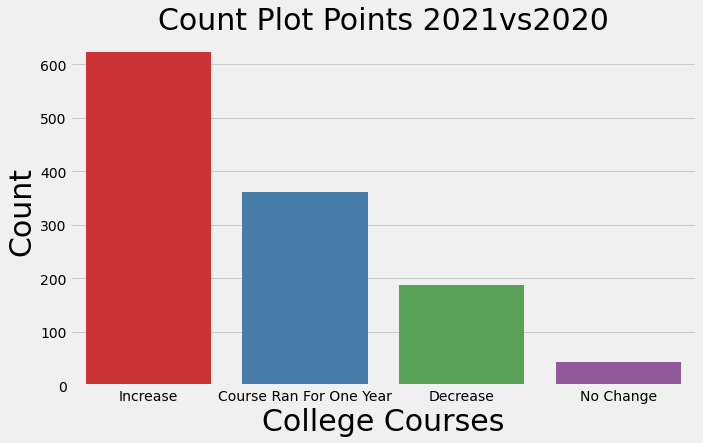

In [102]:
sns.countplot(data = allcourses_r1, x = '2021vs2020', palette = 'Set1',
             order = allcourses_r1['2021vs2020'].value_counts().index)

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title('Count Plot Points 2021vs2020', fontsize = '30')
plt.show()

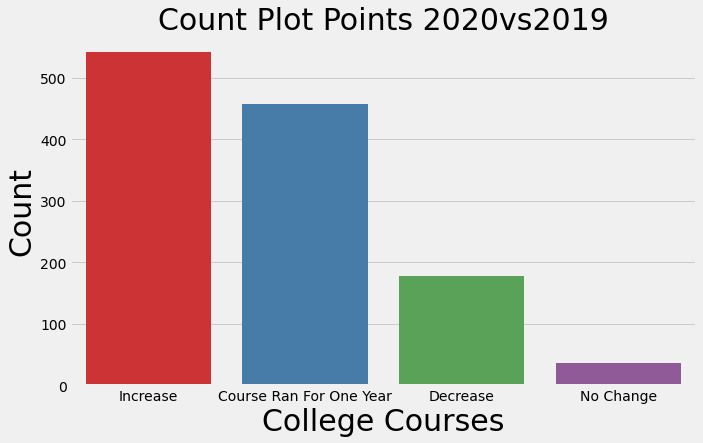

In [103]:
sns.countplot(data = allcourses_r1, x = '2020vs2019', palette = 'Set1',
             order = allcourses_r1['2020vs2019'].value_counts().index)

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title('Count Plot Points 2020vs2019', fontsize = '30')
plt.show()

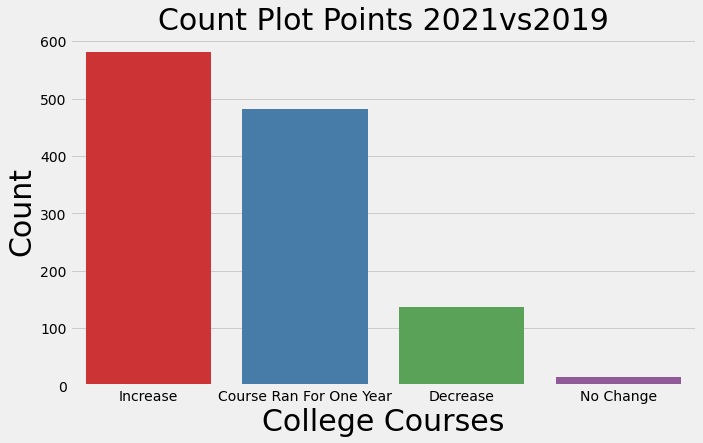

In [104]:
sns.countplot(data = allcourses_r1, x = '2021vs2019', palette = 'Set1',
             order = allcourses_r1['2021vs2019'].value_counts().index)

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title('Count Plot Points 2021vs2019', fontsize = '30')
plt.show()

#### Pie Charts
<br>

Below we can see some `pieplots` for each year for Round 1. We can see here that the points in general seem to be increasing every year. About a third of the courses are decreasing than increasing, and this trend seems to have been very similar for the last 3 years. They tell a very similar story to the `countplots`.

In [105]:
summary_2021vs2020 = allcourses_r1['2021vs2020'].value_counts()
summary_2020vs2019 = allcourses_r1['2020vs2019'].value_counts()
summary_2021vs2019 = allcourses_r1['2021vs2019'].value_counts()

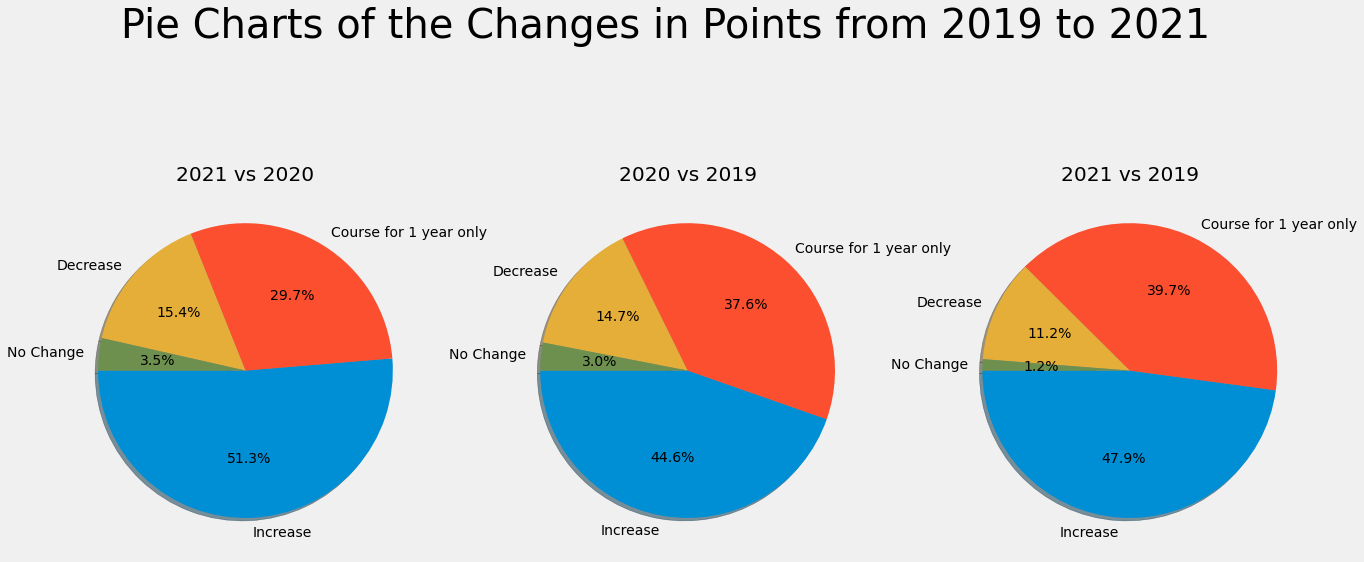

In [106]:
labels = 'Increase', 'Course for 1 year only', 'Decrease', 'No Change'

fig, ax = plt.subplots(1, 3, figsize = (20, 10))

fig.suptitle('Pie Charts of the Changes in Points from 2019 to 2021',
            fontsize = 40)

ax[0].set_title('2021 vs 2020')
ax[0].pie((summary_2021vs2020), labels=labels, autopct='%1.1f%%', 
          shadow = True, startangle=180)

ax[1].set_title('2020 vs 2019')
ax[1].pie((summary_2020vs2019), labels=labels, autopct='%1.1f%%', 
          shadow = True, startangle=180)

ax[2].set_title('2021 vs 2019')
ax[2].pie((summary_2021vs2019), labels=labels, autopct='%1.1f%%', 
          shadow = True, startangle=180)

plt.show()

#### Medicine Bar Plot
<br>

We are now going to hone in on medicine for the last 3 years. This is because medicine historically has been a very popular course and always required the most points by far. It can also be studied by Undergraduates and Graduates. There are also supplemental requirements such as HPAT and GAMSAT, making these courses very difficult to get into. Let's have a look at the trends from the last 3 years.

In [107]:
medicine = ['Medicine (Undergraduate Entry - HPAT required)', 
            'Medicine  - Graduate Entry (GAMSAT required)',
           'Medicine - Undergraduate Entry (HPAT required)',
           'Medicine - Graduate Entry (GAMSAT required)',
           'Medicine (five year/six year course  HPAT required',
           'Medicine  - Graduate Entry (GAMSAT required)',
           'Medicine - Undergraduate Entry (HPAT required)',
           'Medicine - Graduate Entry (GAMSAT required)',
           'Medicine (HPAT required)']

dfmedicine_r1 = allcourses_r1[allcourses_r1['title'].isin(medicine)]
dfmedicine_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info,points_r1_2021-2020,points_r1_2020-2019,points_r1_2021-2019,2021vs2020,2020vs2019,2021vs2019
code,,,,,,,,,,,,,
CK701,Medicine (Undergraduate Entry - HPAT required),738.0,Test/Portfolio,731.0,,729.0,Test/Portfolio,7.0,2.0,9.0,Increase,Increase,Increase
CK791,Medicine - Graduate Entry (GAMSAT required),60.0,Randomly Selected,57.0,,58.0,Randomly Selected,3.0,-1.0,2.0,Increase,Decrease,Increase
DN400,Medicine - Undergraduate Entry (HPAT required),743.0,Randomly Selected,737.0,,735.0,Test/Portfolio,6.0,2.0,8.0,Increase,Increase,Increase
DN401,Medicine - Graduate Entry (GAMSAT required),61.0,Randomly Selected,NaN,,59.0,Randomly Selected,NaN,NaN,2.0,Course Ran For One Year,Course Ran For One Year,Increase
GY501,Medicine (five year/six year course HPAT requ...,737.0,Randomly Selected,728.0,,726.0,Randomly Selected,9.0,2.0,11.0,Increase,Increase,Increase
LM101,Medicine - Graduate Entry (GAMSAT required),57.0,Randomly Selected,55.0,,55.0,Randomly Selected,2.0,0.0,2.0,Increase,No Change,Increase
RC001,Medicine - Undergraduate Entry (HPAT required),741.0,Test/Portfolio,733.0,,729.0,Test/Portfolio,8.0,4.0,12.0,Increase,Increase,Increase
RC101,Medicine - Graduate Entry (GAMSAT required),NaN,,NaN,,60.0,Test/Portfolio,NaN,NaN,NaN,Course Ran For One Year,Course Ran For One Year,Course Ran For One Year
TR051,Medicine (HPAT required),743.0,Randomly Selected,735.0,,730.0,Test/Portfolio,8.0,5.0,13.0,Increase,Increase,Increase


In [108]:
pd.options.mode.chained_assignment = None
dfmedicine_r1['college_courses'] = ['UCC Undergrad', 'UCC Grad', 
                                    'UCD Undergrad', 'UCD Grad', 
                                    'NUIG Six Year', 'UL Grad', 
                                    'RCSI Undergrad', 'RCSI Grad',
                                    'TCD Med']

dfmedicine_r1['HPAT_GAMSAT'] = ['HPAT', 'GAMSAT', 'HPAT', 'GAMSAT', 'HPAT', 
                                'GAMSAT', 'HPAT', 'GAMSAT', 'HPAT']
dfmedicine_r1

,title,points_r1_2021,points_r1_2021_info,points_r1_2020,points_r1_2020_info,points_r1_2019,points_r1_2019_info,points_r1_2021-2020,points_r1_2020-2019,points_r1_2021-2019,2021vs2020,2020vs2019,2021vs2019,college_courses,HPAT_GAMSAT
code,,,,,,,,,,,,,,,
CK701,Medicine (Undergraduate Entry - HPAT required),738.0,Test/Portfolio,731.0,,729.0,Test/Portfolio,7.0,2.0,9.0,Increase,Increase,Increase,UCC Undergrad,HPAT
CK791,Medicine - Graduate Entry (GAMSAT required),60.0,Randomly Selected,57.0,,58.0,Randomly Selected,3.0,-1.0,2.0,Increase,Decrease,Increase,UCC Grad,GAMSAT
DN400,Medicine - Undergraduate Entry (HPAT required),743.0,Randomly Selected,737.0,,735.0,Test/Portfolio,6.0,2.0,8.0,Increase,Increase,Increase,UCD Undergrad,HPAT
DN401,Medicine - Graduate Entry (GAMSAT required),61.0,Randomly Selected,NaN,,59.0,Randomly Selected,NaN,NaN,2.0,Course Ran For One Year,Course Ran For One Year,Increase,UCD Grad,GAMSAT
GY501,Medicine (five year/six year course HPAT requ...,737.0,Randomly Selected,728.0,,726.0,Randomly Selected,9.0,2.0,11.0,Increase,Increase,Increase,NUIG Six Year,HPAT
LM101,Medicine - Graduate Entry (GAMSAT required),57.0,Randomly Selected,55.0,,55.0,Randomly Selected,2.0,0.0,2.0,Increase,No Change,Increase,UL Grad,GAMSAT
RC001,Medicine - Undergraduate Entry (HPAT required),741.0,Test/Portfolio,733.0,,729.0,Test/Portfolio,8.0,4.0,12.0,Increase,Increase,Increase,RCSI Undergrad,HPAT
RC101,Medicine - Graduate Entry (GAMSAT required),NaN,,NaN,,60.0,Test/Portfolio,NaN,NaN,NaN,Course Ran For One Year,Course Ran For One Year,Course Ran For One Year,RCSI Grad,GAMSAT
TR051,Medicine (HPAT required),743.0,Randomly Selected,735.0,,730.0,Test/Portfolio,8.0,5.0,13.0,Increase,Increase,Increase,TCD Med,HPAT


The below `barplots` tell an interesting story. The round 1 points have tended to increase slightly over the years with the only decrease of 1 point from 2019 to 2020. This was the UCD Undergraduate course. The empty bars mean that the course did not change in points at all. It seems to me that by this trend, the round 1 points are likely to go up again next year.

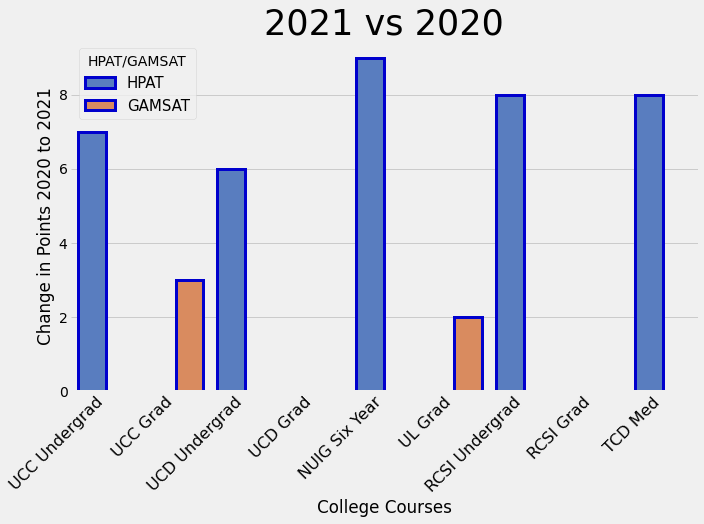

In [109]:
chart_med_r1_2021v2020 = sns.barplot(data = dfmedicine_r1, x = 'college_courses', 
                                y = 'points_r1_2021-2020', palette = 'muted', 
                                ci = None, edgecolor='mediumblue', lw = 3, 
                                    errwidth=5, capsize=0.1, hue = 'HPAT_GAMSAT')

chart_med_r1_2021v2020.set_xticklabels(chart_med_r1_2021v2020.get_xticklabels(), 
                                      rotation = 45, 
                                      horizontalalignment = 'right')

sns.despine(left=True)
plt.xlabel('College Courses')
plt.ylabel('Change in Points 2020 to 2021')
plt.xticks(fontsize = 16)
plt.title('2021 vs 2020', fontsize = '35')
plt.legend(title = 'HPAT/GAMSAT', fontsize = '15')
plt.show()

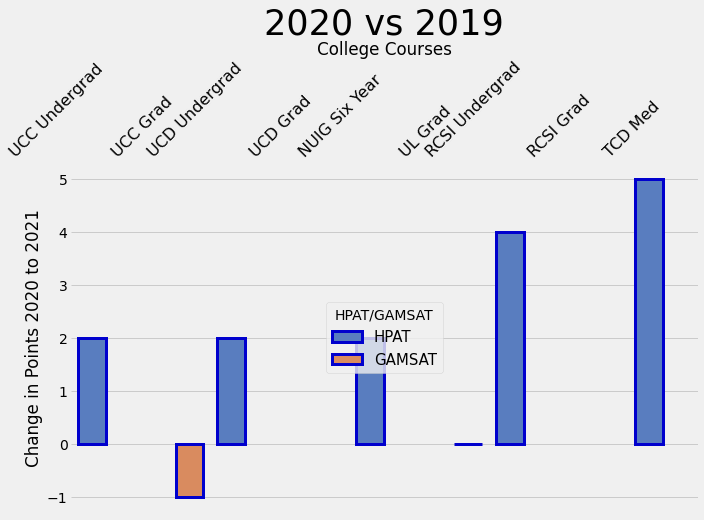

In [110]:
chart_med_r1_2020v2019 = sns.barplot(data = dfmedicine_r1, x = 'college_courses', 
                                y = 'points_r1_2020-2019', palette = 'muted', 
                                ci = None, edgecolor='mediumblue', lw = 3, 
                                    errwidth=5, capsize=0.1, hue = 'HPAT_GAMSAT')

chart_med_r1_2020v2019.set_xticklabels(chart_med_r1_2020v2019.get_xticklabels(), 
                                      rotation = 45, 
                                      horizontalalignment = 'right')

chart_med_r1_2020v2019.xaxis.tick_top()
chart_med_r1_2020v2019.xaxis.set_label_position('top') 

sns.despine(left=True)
plt.xlabel('College Courses')
plt.ylabel('Change in Points 2020 to 2021')
plt.xticks(fontsize = 16)
plt.title('2020 vs 2019', fontsize = '35')
plt.legend(title = 'HPAT/GAMSAT', fontsize = '15', loc = 'center')
plt.show()

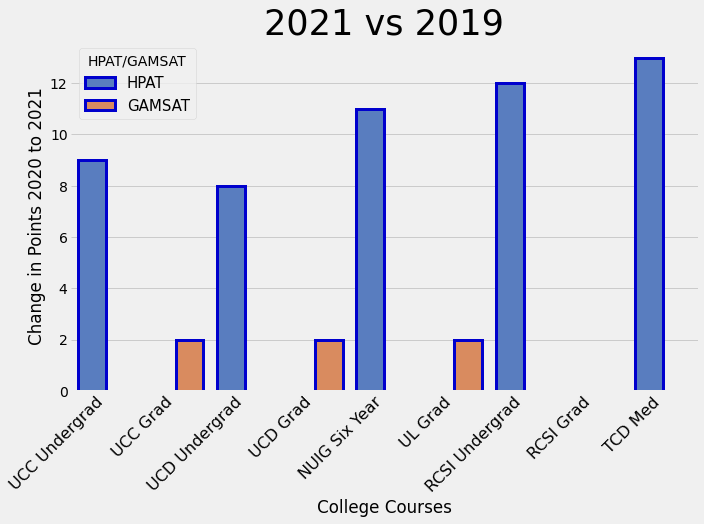

In [111]:
chart_med_r1_2021v2019 = sns.barplot(data = dfmedicine_r1, x = 'college_courses', 
                                y = 'points_r1_2021-2019', palette = 'muted', 
                                ci = None, edgecolor='mediumblue', lw = 3, 
                                    errwidth=5, capsize=0.1, hue = 'HPAT_GAMSAT')

chart_med_r1_2021v2019.set_xticklabels(chart_med_r1_2021v2019.get_xticklabels(), 
                                      rotation = 45, 
                                      horizontalalignment = 'right')

sns.despine(left=True)
plt.xlabel('College Courses')
plt.ylabel('Change in Points 2020 to 2021')
plt.xticks(fontsize = 16)
plt.title('2021 vs 2019', fontsize = '35')
plt.legend(title = 'HPAT/GAMSAT', fontsize = '15', loc = 'upper left')
plt.show()

#### Histograms
<br>

The final analysis that we will do is a `histplot` of each year. This is a histogram with a kde distribution. This is just showing us the distribution of the points over all of the courses. The kde or kernal density estimation, is the curve on the plot. This shows us where most of the points are. The Y-axis is the probability. Essentially the higher the 'bin'(bar), the more likely it is that a course requires that many points. We can see that most points are at the 300 mark for all years.

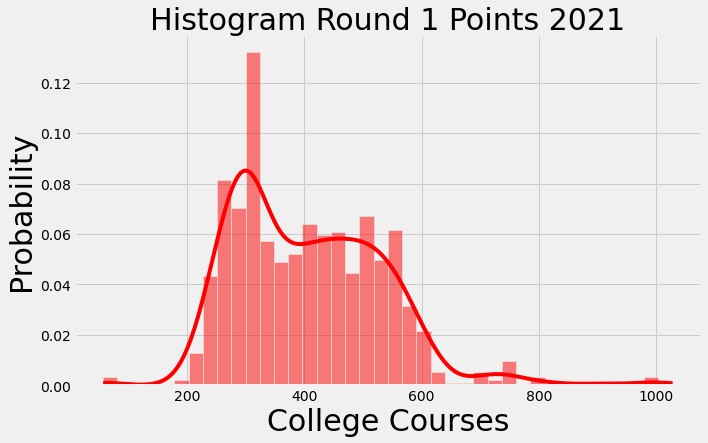

In [112]:
sns.histplot(data = allcourses_r1, x = 'points_r1_2021', kde=True,
             stat = 'probability', bins = 40, color = 'red')

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Probability', fontsize = 30)
plt.title('Histogram Round 1 Points 2021', fontsize = '30')
plt.show()

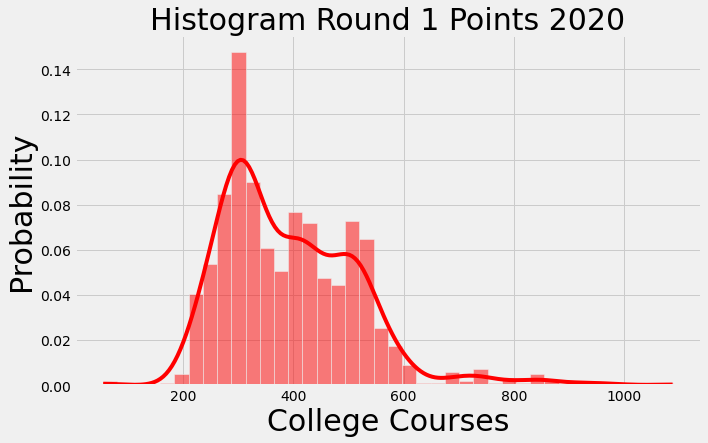

In [113]:
sns.histplot(data = allcourses_r1, x = 'points_r1_2020', kde=True,
             stat = 'probability', bins = 40, color = 'red')

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Probability', fontsize = 30)
plt.title('Histogram Round 1 Points 2020', fontsize = '30')
plt.show()

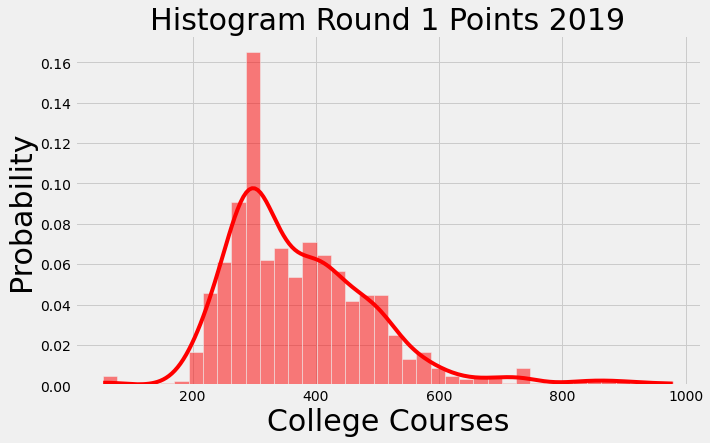

In [114]:
sns.histplot(data = allcourses_r1, x = 'points_r1_2019', kde=True,
             stat = 'probability', bins = 40, color = 'red')

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Probability', fontsize = 30)
plt.title('Histogram Round 1 Points 2019', fontsize = '30')
plt.show()

### Round 2 Analysis
***
<br>

Below is a filter that I have created to check any course of interest for Round 2 points. All you need to do is change the `college_choice` object to filter the courses.

In [115]:
# https://datatofish.com/filter-pandas-dataframe/
college_choice = 'AC'
allcourses_r2.filter(like = college_choice, axis=0)

,title,points_r2_2021,points_r2_2021_info,points_r2_2020,points_r2_2020_info,points_r2_2019,points_r2_2019_info
code,,,,,,,
AC120,International Business,294.0,,NaN,,234.0,
AC137,Liberal Arts,270.0,,NaN,,252.0,


The first thing of note to understand about the points over the years is how much they have either increased, decreased or if there has been no change. To do this, let's use the pandas method of subtracting 2 columns. [22] We can use a python Function to categorise the results based on points increasing or decreasing. I have created these functions below. [13], [14]

In [116]:
allcourses_r2['points_r2_2021-2020'] = allcourses_r2.points_r2_2021 - allcourses_r2.points_r2_2020
allcourses_r2['points_r2_2020-2019'] = allcourses_r2.points_r2_2020 - allcourses_r2.points_r2_2019
allcourses_r2['points_r2_2021-2019'] = allcourses_r2.points_r2_2021 - allcourses_r2.points_r2_2019
allcourses_r2

,title,points_r2_2021,points_r2_2021_info,points_r2_2020,points_r2_2020_info,points_r2_2019,points_r2_2019_info,points_r2_2021-2020,points_r2_2020-2019,points_r2_2021-2019
code,,,,,,,,,,
AC120,International Business,294.0,,NaN,,234.0,,NaN,NaN,60.0
AC137,Liberal Arts,270.0,,NaN,,252.0,,NaN,NaN,18.0
AD101,First Year Art and Design (Common Entry portfo...,NaN,Test/Portfolio,NaN,Test/Portfolio,550.0,Test/Portfolio,NaN,NaN,NaN
AD102,Graphic Design and Moving Image Design (portfo...,NaN,Test/Portfolio,NaN,Test/Portfolio,635.0,Test/Portfolio,NaN,NaN,NaN
AD103,Textile and Surface Design and Jewellery and O...,NaN,Test/Portfolio,NaN,Test/Portfolio,545.0,Test/Portfolio,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,NaN,,NaN,,275.0,,NaN,NaN,NaN
WD212,Recreation and Sport Management,NaN,,NaN,,274.0,,NaN,NaN,NaN
WD230,Mechanical and Manufacturing Engineering,230.0,,NaN,,273.0,,NaN,NaN,-43.0


In [117]:
# Function to categorise the results based on points increasing or decreasing.
# 2020 to 2021 [13], [14]

def change_in_points_20to21(x):
    if x['points_r2_2021-2020'] > 0:
        return 'Increase'
    elif x['points_r2_2021-2020'] < 0:
        return 'Decrease'
    elif x['points_r2_2021-2020'] == 0:
        return 'No Change'
    else:
        return 'Course Ran For One Year'

# Function to categorise the results based in points increasing or decreasing.
# 2019 to 2020

def change_in_points_19to20(x):
    if x['points_r2_2020-2019'] > 0:
        return 'Increase'
    elif x['points_r2_2020-2019'] < 0:
        return 'Decrease'
    elif x['points_r2_2020-2019'] == 0:
        return 'No Change'
    else:
        return 'Course Ran For One Year'
    
# Function to categorise the results based in points increasing or decreasing.
# 2019 to 2021

def change_in_points_19to21(x):
    if x['points_r2_2021-2019'] > 0:
        return 'Increase'
    elif x['points_r2_2021-2019'] < 0:
        return 'Decrease'
    elif x['points_r2_2021-2019'] == 0:
        return 'No Change'
    else:
        return 'Course Ran For One Year'

In [118]:
# Use pd.DataFrame.apply to add the change in points columns to the 
# allcourses dataframe [13], [14]

allcourses_r2['2021vs2020'] = allcourses_r2.apply (lambda x: change_in_points_20to21(x), axis = 1)
allcourses_r2['2020vs2019'] = allcourses_r2.apply (lambda x: change_in_points_19to20(x), axis = 1)
allcourses_r2['2021vs2019'] = allcourses_r2.apply (lambda x: change_in_points_19to21(x), axis = 1)

The below code with the `displays` in front of them show the shape of each of the special requirements of those courses. The first number in the brackets is the only number of interest, the second one is just the number of rows. This number indicates how many had a 'Test/Portfolio for example'. An interesting statistic is that for only 3 courses altogether every applicant in that case got a place. This is the 'All Qualified Applicants' key.

In [119]:
display((allcourses_r2.loc[allcourses_r2.points_r2_2021_info == 'Test/Portfolio']).shape)
display((allcourses_r2.loc[allcourses_r2.points_r2_2020_info == 'Test/Portfolio']).shape)
display((allcourses_r2.loc[allcourses_r2.points_r2_2019_info == 'Test/Portfolio']).shape)

(74, 13)

(22, 13)

(89, 13)

In [120]:
display((allcourses_r2.loc[allcourses_r2.points_r2_2021_info == 'Randomly Selected']).shape)
display((allcourses_r2.loc[allcourses_r2.points_r2_2020_info == 'Randomly Selected']).shape)
display((allcourses_r2.loc[allcourses_r2.points_r2_2019_info == 'Randomly Selected']).shape)

(75, 13)

(0, 13)

(45, 13)

In [121]:
display((allcourses_r2.loc[allcourses_r2.points_r2_2021_info == 'All Qualified Applicants']).shape)
display((allcourses_r2.loc[allcourses_r2.points_r2_2020_info == 'All Qualified Applicants']).shape)
display((allcourses_r2.loc[allcourses_r2.points_r2_2019_info == 'All Qualified Applicants']).shape)

(1, 13)

(2, 13)

(0, 13)

In [122]:
# Check the counts for each category in the dataset

allcourses_r2['2021vs2020'].value_counts()

Course Ran For One Year    1113
Increase                     76
Decrease                     23
No Change                     2
Name: 2021vs2020, dtype: int64

In [123]:
print(f'''A summary of the amount of courses that increased or decreased 
      from 2020 to 2021 are as follows:\n\n{allcourses_r2['2021vs2020'].value_counts()}\n\n''')
print(f'''A summary of the amount of courses that increased or decreased 
      from 2019 to 2020 are as follows:\n\n{allcourses_r2['2020vs2019'].value_counts()}\n\n''')
print(f'''A summary of the amount of courses that increased or decreased 
      from 2019 to 2021 are as follows:\n\n{allcourses_r2['2021vs2019'].value_counts()}''')

A summary of the amount of courses that increased or decreased 
      from 2020 to 2021 are as follows:

Course Ran For One Year    1113
Increase                     76
Decrease                     23
No Change                     2
Name: 2021vs2020, dtype: int64


A summary of the amount of courses that increased or decreased 
      from 2019 to 2020 are as follows:

Course Ran For One Year    1055
Increase                    125
Decrease                     29
No Change                     5
Name: 2020vs2019, dtype: int64


A summary of the amount of courses that increased or decreased 
      from 2019 to 2021 are as follows:

Course Ran For One Year    995
Increase                   183
Decrease                    34
No Change                    2
Name: 2021vs2019, dtype: int64


#### Count Plots
<br>

Below we can see some `countplots` for each year for Round 2. We can see here that the points in general seem to have only ran for one year. This doesn't seem to tell us as much as the round 1 points did.

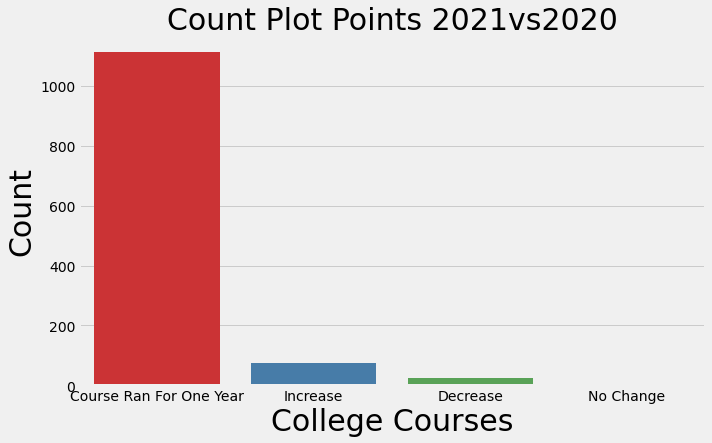

In [124]:
sns.countplot(data = allcourses_r2, x = '2021vs2020', palette = 'Set1',
             order = allcourses_r2['2021vs2020'].value_counts().index)

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title('Count Plot Points 2021vs2020', fontsize = '30')
plt.show()

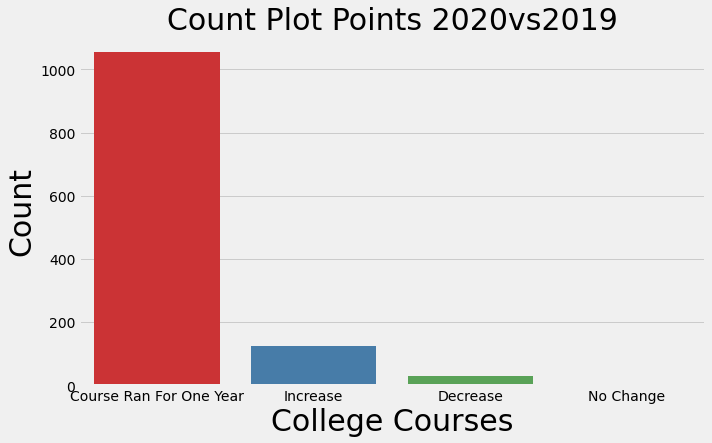

In [125]:
sns.countplot(data = allcourses_r2, x = '2020vs2019', palette = 'Set1',
             order = allcourses_r2['2020vs2019'].value_counts().index)

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title('Count Plot Points 2020vs2019', fontsize = '30')
plt.show()

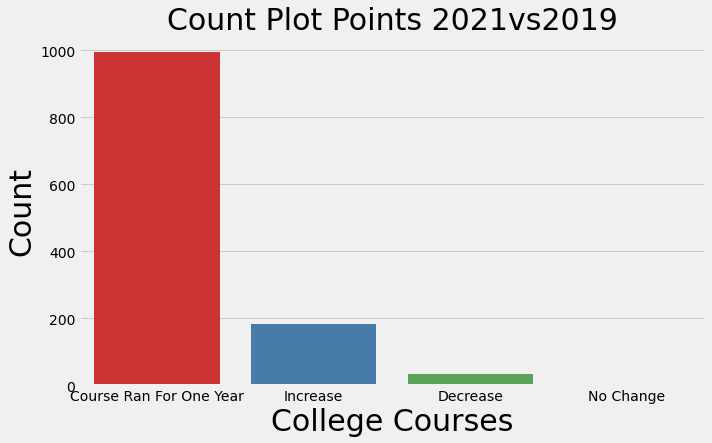

In [126]:
sns.countplot(data = allcourses_r2, x = '2021vs2019', palette = 'Set1',
              order = allcourses_r2['2021vs2019'].value_counts().index)

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Count', fontsize = 30)
plt.title('Count Plot Points 2021vs2019', fontsize = '30')
plt.show()

#### Pie Charts
<br>

Below we can see some `pieplots` for each year for Round 2. We can see here that the points in general seem to have only ran for one year. This doesn't seem to tell us as much as the round 1 points did.

In [127]:
summary_2021vs2020 = allcourses_r2['2021vs2020'].value_counts()
summary_2020vs2019 = allcourses_r2['2020vs2019'].value_counts()
summary_2021vs2019 = allcourses_r2['2021vs2019'].value_counts()

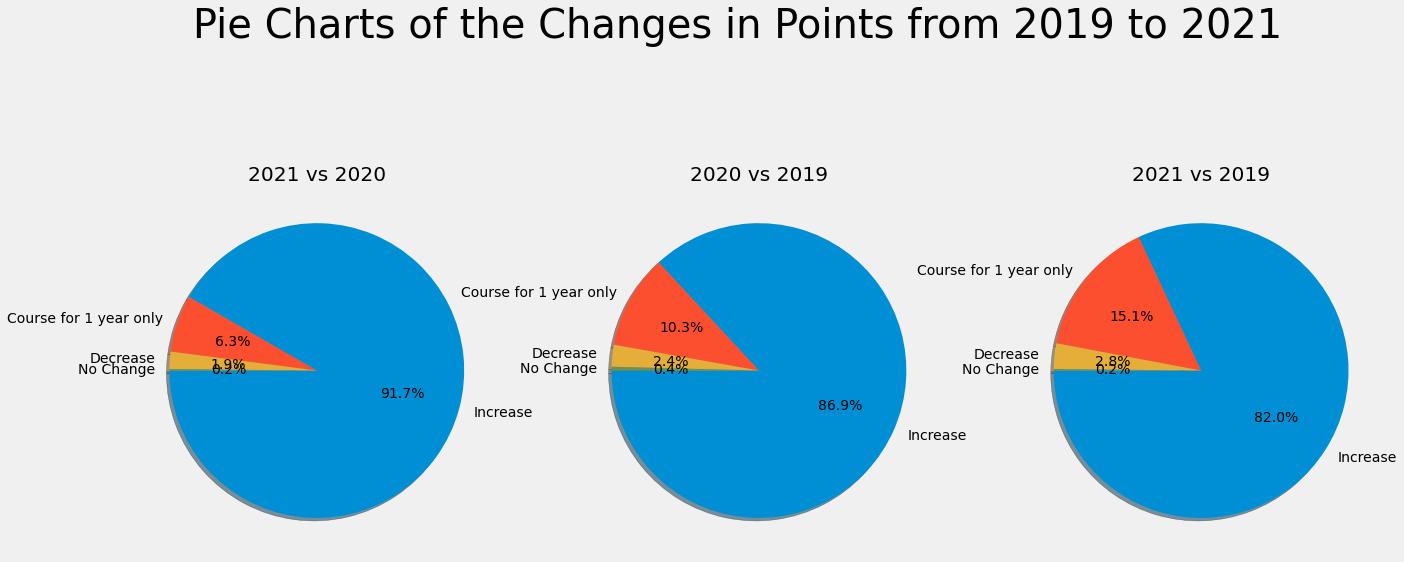

In [128]:
labels = 'Increase', 'Course for 1 year only', 'Decrease', 'No Change'

fig, ax = plt.subplots(1, 3, figsize = (20, 10))

fig.suptitle('Pie Charts of the Changes in Points from 2019 to 2021',
            fontsize = 40)

ax[0].set_title('2021 vs 2020')
ax[0].pie((summary_2021vs2020), labels=labels, autopct='%1.1f%%', 
          shadow = True, startangle=180)

ax[1].set_title('2020 vs 2019')
ax[1].pie((summary_2020vs2019), labels=labels, autopct='%1.1f%%', 
          shadow = True, startangle=180)

ax[2].set_title('2021 vs 2019')
ax[2].pie((summary_2021vs2019), labels=labels, autopct='%1.1f%%', 
          shadow = True, startangle=180)

plt.show()

#### Medicine Bar Plots
<br>

We are now going to hone in on medicine for the last 3 years. This is because medicine historically has been a very popular course and always required the most points by far. It can also be studied by Undergraduates and Graduates. There are also supplemental requirements such as HPAT and GAMSAT, making these courses very difficult to get into. Let's have a look at the trends from the last 3 years.

In [129]:
medicine = ['Medicine (Undergraduate Entry - HPAT required)', 
            'Medicine  - Graduate Entry (GAMSAT required)',
           'Medicine - Undergraduate Entry (HPAT required)',
           'Medicine - Graduate Entry (GAMSAT required)',
           'Medicine (five year/six year course  HPAT required',
           'Medicine  - Graduate Entry (GAMSAT required)',
           'Medicine - Undergraduate Entry (HPAT required)',
           'Medicine - Graduate Entry (GAMSAT required)',
           'Medicine (HPAT required)']

dfmedicine_r2 = allcourses_r2[allcourses_r2['title'].isin(medicine)]
pd.options.mode.chained_assignment = None
dfmedicine_r2['college_courses'] = ['UCC Undergrad', 'UCC Grad', 
                                    'UCD Undergrad', 'UCD Grad', 
                                    'NUIG Six Year', 'UL Grad', 
                                    'RCSI Undergrad', 'RCSI Grad',
                                    'TCD Med']

dfmedicine_r2['HPAT_GAMSAT'] = ['HPAT', 'GAMSAT', 'HPAT', 'GAMSAT', 'HPAT', 
                                'GAMSAT', 'HPAT', 'GAMSAT', 'HPAT']
dfmedicine_r2

,title,points_r2_2021,points_r2_2021_info,points_r2_2020,points_r2_2020_info,points_r2_2019,points_r2_2019_info,points_r2_2021-2020,points_r2_2020-2019,points_r2_2021-2019,2021vs2020,2020vs2019,2021vs2019,college_courses,HPAT_GAMSAT
code,,,,,,,,,,,,,,,
CK701,Medicine (Undergraduate Entry - HPAT required),737.0,Test/Portfolio,NaN,,729.0,Test/Portfolio,NaN,NaN,8.0,Course Ran For One Year,Course Ran For One Year,Increase,UCC Undergrad,HPAT
CK791,Medicine - Graduate Entry (GAMSAT required),60.0,Randomly Selected,NaN,,58.0,Randomly Selected,NaN,NaN,2.0,Course Ran For One Year,Course Ran For One Year,Increase,UCC Grad,GAMSAT
DN400,Medicine - Undergraduate Entry (HPAT required),NaN,Randomly Selected,736.0,,735.0,Test/Portfolio,NaN,1.0,NaN,Course Ran For One Year,Increase,Course Ran For One Year,UCD Undergrad,HPAT
DN401,Medicine - Graduate Entry (GAMSAT required),NaN,Randomly Selected,NaN,,59.0,Randomly Selected,NaN,NaN,NaN,Course Ran For One Year,Course Ran For One Year,Course Ran For One Year,UCD Grad,GAMSAT
GY501,Medicine (five year/six year course HPAT requ...,737.0,Randomly Selected,NaN,,726.0,Randomly Selected,NaN,NaN,11.0,Course Ran For One Year,Course Ran For One Year,Increase,NUIG Six Year,HPAT
LM101,Medicine - Graduate Entry (GAMSAT required),NaN,Randomly Selected,NaN,,55.0,Randomly Selected,NaN,NaN,NaN,Course Ran For One Year,Course Ran For One Year,Course Ran For One Year,UL Grad,GAMSAT
RC001,Medicine - Undergraduate Entry (HPAT required),740.0,Test/Portfolio,NaN,,729.0,Test/Portfolio,NaN,NaN,11.0,Course Ran For One Year,Course Ran For One Year,Increase,RCSI Undergrad,HPAT
RC101,Medicine - Graduate Entry (GAMSAT required),NaN,,NaN,,60.0,Test/Portfolio,NaN,NaN,NaN,Course Ran For One Year,Course Ran For One Year,Course Ran For One Year,RCSI Grad,GAMSAT
TR051,Medicine (HPAT required),743.0,Randomly Selected,734.0,,730.0,Test/Portfolio,9.0,4.0,13.0,Increase,Increase,Increase,TCD Med,HPAT


The below `barplots` tell an interesting story. The round 2 points forTCD have tended to increase slightly over the years with no decrease of points from 2019 to 2020. The empty bars mean that the course did not change in points at all which was most of them. It seems to me that by this trend, the round 2 points are hard to predict.

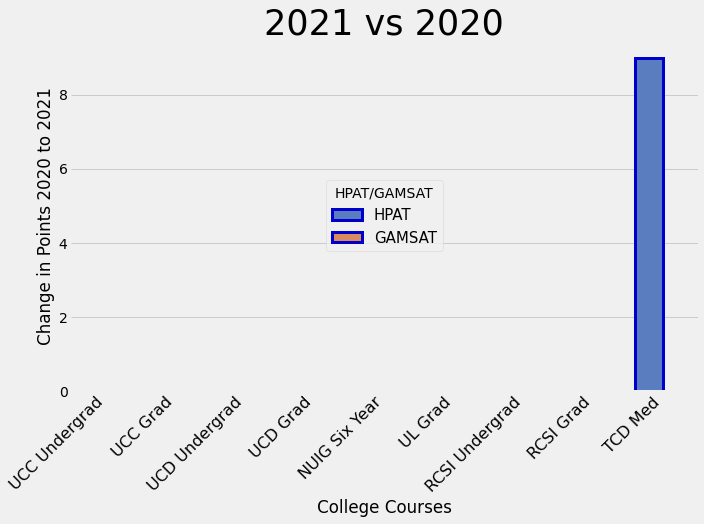

In [130]:
chart_med_r2_2021v2020 = sns.barplot(data = dfmedicine_r2, x = 'college_courses', 
                                y = 'points_r2_2021-2020', palette = 'muted', 
                                ci = None, edgecolor='mediumblue', lw = 3, 
                                    errwidth=5, capsize=0.1, hue = 'HPAT_GAMSAT')

chart_med_r2_2021v2020.set_xticklabels(chart_med_r2_2021v2020.get_xticklabels(), 
                                      rotation = 45, 
                                      horizontalalignment = 'right')

sns.despine(left=True)
plt.xlabel('College Courses')
plt.ylabel('Change in Points 2020 to 2021')
plt.xticks(fontsize = 16)
plt.title('2021 vs 2020', fontsize = '35')
plt.legend(title = 'HPAT/GAMSAT', fontsize = '15', loc = 'center')
plt.show()

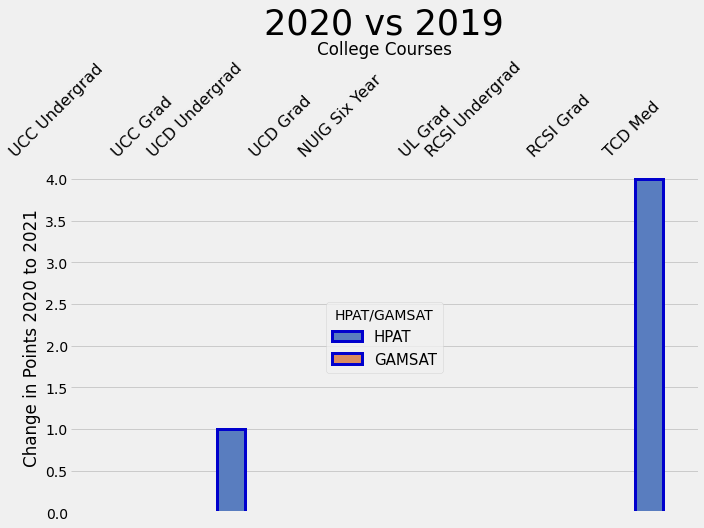

In [131]:
chart_med_r2_2020v2019 = sns.barplot(data = dfmedicine_r2, x = 'college_courses', 
                                y = 'points_r2_2020-2019', palette = 'muted', 
                                ci = None, edgecolor='mediumblue', lw = 3, 
                                    errwidth=5, capsize=0.1, hue = 'HPAT_GAMSAT')

chart_med_r2_2020v2019.set_xticklabels(chart_med_r2_2020v2019.get_xticklabels(), 
                                      rotation = 45, 
                                      horizontalalignment = 'right')

chart_med_r2_2020v2019.xaxis.tick_top()
chart_med_r2_2020v2019.xaxis.set_label_position('top') 

sns.despine(left=True)
plt.xlabel('College Courses')
plt.ylabel('Change in Points 2020 to 2021')
plt.xticks(fontsize = 16)
plt.title('2020 vs 2019', fontsize = '35')
plt.legend(title = 'HPAT/GAMSAT', fontsize = '15', loc = 'center')
plt.show()

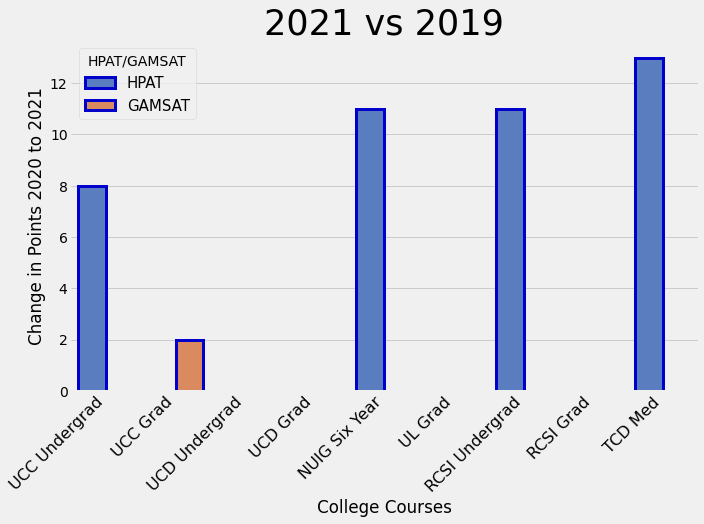

In [132]:
chart_med_r2_2021v2019 = sns.barplot(data = dfmedicine_r2, x = 'college_courses', 
                                y = 'points_r2_2021-2019', palette = 'muted', 
                                ci = None, edgecolor='mediumblue', lw = 3, 
                                    errwidth=5, capsize=0.1, hue = 'HPAT_GAMSAT')

chart_med_r2_2021v2019.set_xticklabels(chart_med_r2_2021v2019.get_xticklabels(), 
                                      rotation = 45, 
                                      horizontalalignment = 'right')

sns.despine(left=True)
plt.xlabel('College Courses')
plt.ylabel('Change in Points 2020 to 2021')
plt.xticks(fontsize = 16)
plt.title('2021 vs 2019', fontsize = '35')
plt.legend(title = 'HPAT/GAMSAT', fontsize = '15', loc = 'upper left')
plt.show()

#### Histograms
<br>

The final analysis that we will do is a `histplot` of each year. This is a histogram with a kde distribution. This is just showing us the distribution of the points over all of the courses. The kde or kernal density estimation, is the curve on the plot. This shows us where most of the points are. The Y-axis is the probability. Essentially the higher the 'bin'(bar), the more likely it is that a course requires that many points. We can see that for the round 2 points, the points are much more all over the place that they were for the Round 1 points.

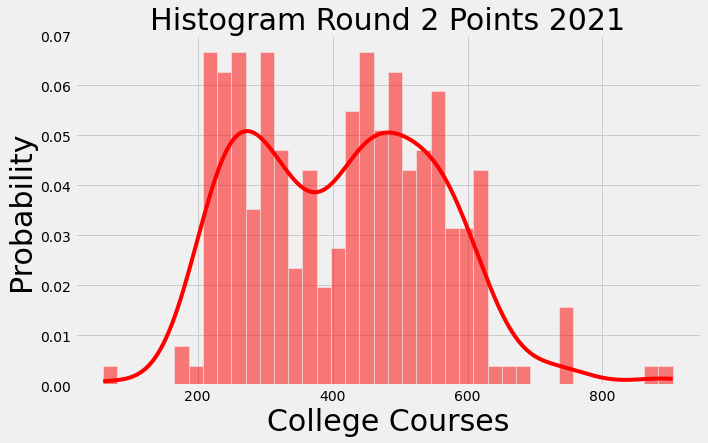

In [133]:
sns.histplot(data = allcourses_r2, x = 'points_r2_2021', kde=True,
             stat = 'probability', bins = 40, color = 'red')

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Probability', fontsize = 30)
plt.title('Histogram Round 2 Points 2021', fontsize = '30')
plt.show()

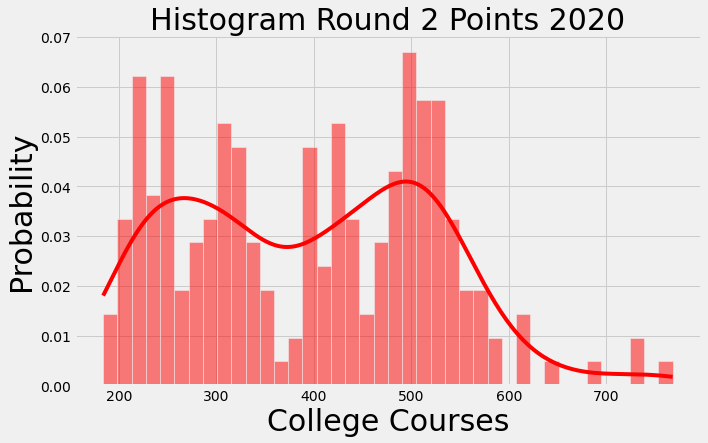

In [134]:
sns.histplot(data = allcourses_r2, x = 'points_r2_2020', kde=True,
             stat = 'probability', bins = 40, color = 'red')

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Probability', fontsize = 30)
plt.title('Histogram Round 2 Points 2020', fontsize = '30')
plt.show()

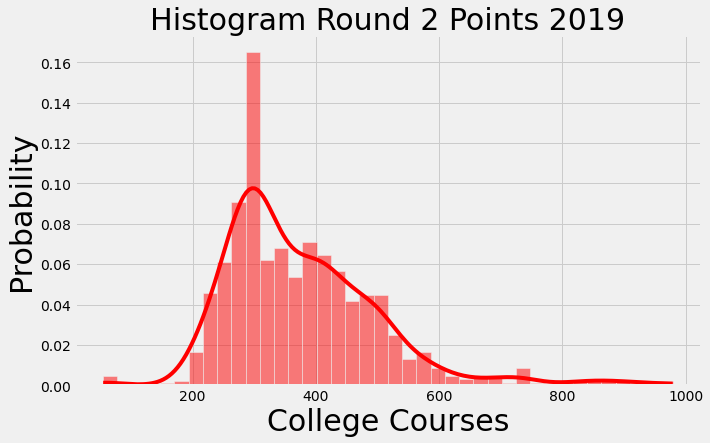

In [135]:
sns.histplot(data = allcourses_r2, x = 'points_r2_2019', kde=True,
             stat = 'probability', bins = 40, color = 'red')

plt.xlabel('College Courses', fontsize = 30)
plt.ylabel('Probability', fontsize = 30)
plt.title('Histogram Round 2 Points 2019', fontsize = '30')
plt.show()

***
## References
***

[01][The official Python Regular Expressions Documentation](https://docs.python.org/3/library/re.html)<br>
[02][Camelot: PDF Table Extraction for Humans](https://camelot-py.readthedocs.io/en/master/)<br>
[03][How to Extract tabular data from PDF document using Camelot in Python](https://www.analyticsvidhya.com/blog/2020/08/how-to-extract-tabular-data-from-pdf-document-using-camelot-in-python/)<br>
[04][Camelot - Quickstart](https://camelot-py.readthedocs.io/en/master/user/quickstart.html)<br>
[05][Camelot - API Documentation](https://camelot-py.readthedocs.io/en/master/api.html)<br>
[06][Ghostscript](https://www.ghostscript.com/releases/gsdnld.html)<br>
[07][pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)<br>
[08][Stackoverflow - Merging two or more continuous tables from a list in Python](https://stackoverflow.com/questions/60082511/merging-two-or-more-continuous-tables-from-a-list-in-python)<br>
[09][Data to Fish - How to Convert Strings to Integers in Pandas DataFrame](https://datatofish.com/string-to-integer-dataframe/)<br>
[10][pandas - pandas.DataFrame.dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)<br>
[11][GeeksforGeeks - Python | Pandas dataframe.replace()](https://www.geeksforgeeks.org/python-pandas-dataframe-replace/)<br>
[12][Shane Lynn - Delete Rows & Columns in DataFrames Quickly using Pandas Drop](https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/)<br>
[13][pandas.DataFrame.apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)<br>
[14][stackoverflow - Adding a column in pandas df using a function](https://stackoverflow.com/questions/40045632/adding-a-column-in-pandas-df-using-a-function)<br>
[15][www.jquery-az.com - etting current date by Python datetime now() function](https://www.jquery-az.com/python-datetime-now/)<br>
[16][https://strftime.org - Python strftime cheatsheet](https://strftime.org/)<br>
[17][GeeksforGeeks - How to rename columns in Pandas DataFrame](https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/)<br>
[18][datagy.iodatagy.io - Pandas: Convert Column Values to StringsPandas: Convert Column Values to Strings](https://datagy.io/pandas-column-vhttps://datagy.io/pandas-column-v)<br>
[19][docs.python.orgdocs.python.org - urllib.request — Extensible library for opening URLs urllib.request — Extensible library for opening URLs](https://docs.python.org/3/library/urllib.request.htmlhttps://docs.python.org/3/library/urllib.request.html)<br>
[20][Pandas Concatonate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.htmlhttps://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)<br>
[21][pandas.DataFrame.sort_valuespandas.DataFrame.sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.htmlhttps://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)<br>
[22][www.statology.orgwww.statology.org - How to Subtract Two Columns in Pandas DataFrameHow to Subtract Two Columns in Pandas DataFrame](https://www.statology.org/pandas-subtract-two-columns/https://www.statology.org/pandas-subtract-two-columns/)<br>

***
# End